In [3]:
import pandas as pd
from sklearn import svm
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline 


df = pd.read_csv("Data-Collisions.csv", delimiter=",")
df.head()

/Users/michaltazky/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [2]:
cd ~/Downloads

/Users/michaltazky/Downloads


*DATA CLEANING*

In [4]:
df = df[[i for i in df.columns if i in ('VEHCOUNT','WEATHER','SEVERITYCODE','ADDRTYPE','ROADCOND','LIGHTCOND', 'LOCATION')]]
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,5TH AVE NE AND NE 103RD ST,2,Overcast,Wet,Daylight
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,Raining,Wet,Dark - Street Lights On
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,3,Overcast,Dry,Daylight
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,3,Clear,Dry,Daylight
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,2,Raining,Wet,Daylight


In [7]:
df.isnull().sum()

SEVERITYCODE    0
ADDRTYPE        0
LOCATION        0
VEHCOUNT        0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
dtype: int64

In [6]:
df = df.dropna()

In [13]:
df['ROADCOND'].value_counts()

Dry               120773
Wet                46160
Ice                 1085
Snow/Slush           839
Other                105
Standing Water       104
Oil                   61
Sand/Mud/Dirt         59
Name: ROADCOND, dtype: int64

In [9]:
df = df[df.ROADCOND != 'Unknown']

In [10]:
df = df[df.WEATHER != 'Unknown']

In [11]:
df = df[df.LIGHTCOND != 'Unknown']

In [12]:
df_new = df[df.groupby('LOCATION').LOCATION.transform('count')>10].copy() 

*DATA ANALYSIS*

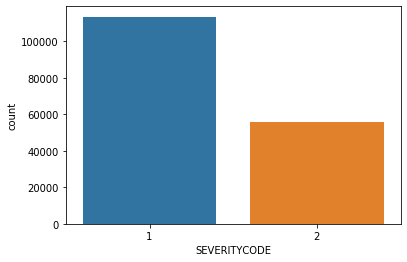

In [14]:
sns.countplot(df['SEVERITYCODE'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

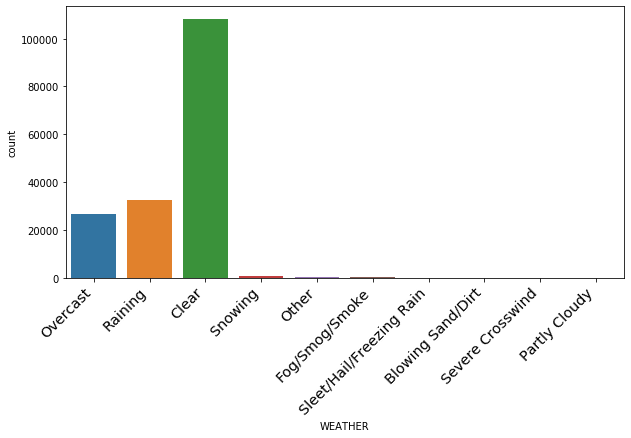

In [65]:
plt.figure(figsize=(10,5))

sns.countplot(df['WEATHER'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

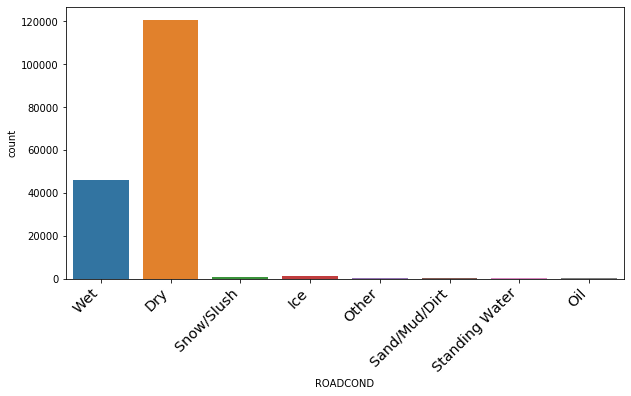

In [16]:
plt.figure(figsize=(10,5))

sns.countplot(df['ROADCOND'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

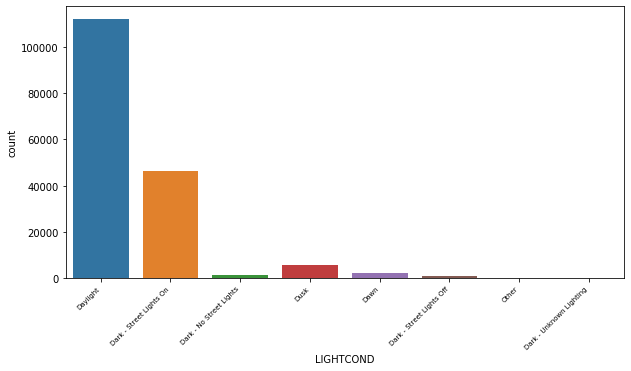

In [17]:
plt.figure(figsize=(10,5))

sns.countplot(df['LIGHTCOND'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

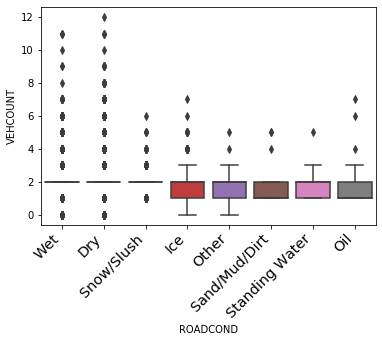

In [18]:
sns.boxplot(data = df, x=df['ROADCOND'], y=df['VEHCOUNT'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')



**FEATURE ENGINEERING**

In [ ]:
df_new

In [64]:
q

,SEVERITYCODE,ADDRTYPE,LOCATION,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,5TH AVE NE AND NE 103RD ST,2,Overcast,Wet,Daylight
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,Raining,Wet,Dark - Street Lights On
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,3,Overcast,Dry,Daylight
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,3,Clear,Dry,Daylight
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,2,Raining,Wet,Daylight
...,...,...,...,...,...,...,...
194668,2,Block,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,2,Clear,Dry,Daylight
194669,1,Block,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,2,Raining,Wet,Daylight
194670,2,Intersection,20TH AVE NE AND NE 75TH ST,2,Clear,Dry,Daylight
194671,2,Intersection,GREENWOOD AVE N AND N 68TH ST,1,Clear,Dry,Dusk


In [19]:
data_crosstab = pd.crosstab(df['WEATHER'], df['SEVERITYCODE'],  normalize=True) 
print(data_crosstab) 

SEVERITYCODE                     1         2
WEATHER                                     
Blowing Sand/Dirt         0.000177  0.000077
Clear                     0.429214  0.209722
Fog/Smog/Smoke            0.002151  0.001076
Other                     0.001023  0.000461
Overcast                  0.107367  0.050855
Partly Cloudy             0.000012  0.000018
Raining                   0.126742  0.065431
Severe Crosswind          0.000106  0.000041
Sleet/Hail/Freezing Rain  0.000491  0.000160
Snowing                   0.003907  0.000969


In [60]:
dfe = pd.DataFrame()

In [61]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
dfe['ADDRTYPE'] = enc.fit_transform(df['ADDRTYPE'])
dfe['WEATHER'] = enc.fit_transform(df['WEATHER'])
dfe['ROADCOND'] = enc.fit_transform(df['ROADCOND'])
dfe['LIGHTCOND'] = enc.fit_transform(df['LIGHTCOND'])
dfe['LOCATION'] = enc.fit_transform(df['LOCATION'])
dfe['SEVERITYCODE'] = df['SEVERITYCODE']

In [62]:
dfe

,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,LOCATION,SEVERITYCODE
0,1,4,7,5,8174,2.0
1,0,6,7,2,10005,1.0
2,0,4,0,5,7478,1.0
3,0,1,0,5,4373,1.0
4,1,6,7,5,21255,2.0
...,...,...,...,...,...,...
169181,0,1,0,5,5322,2.0
169182,0,6,7,5,9977,1.0
169183,1,1,0,5,2626,1.0
169184,1,1,0,6,13264,1.0


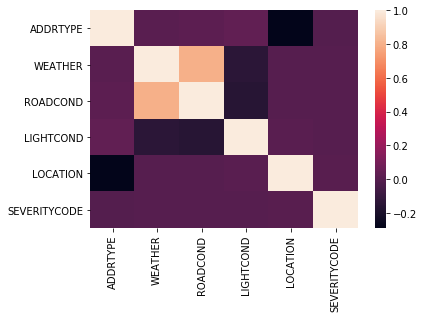

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = dfe.iloc[:,].corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.show()

In [20]:
# generate binary values using get_dummies
df_final = pd.get_dummies(df_new["ADDRTYPE"], prefix=["ADD_is"] )
# merge with main df bridge_df on key values

In [21]:
df_learn = pd.concat([df_new,df_final], axis=1)
df_learn

,SEVERITYCODE,ADDRTYPE,LOCATION,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,['ADD_is']_Block,['ADD_is']_Intersection
0,2,Intersection,5TH AVE NE AND NE 103RD ST,2,Overcast,Wet,Daylight,0,1
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,Raining,Wet,Dark - Street Lights On,1,0
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,3,Overcast,Dry,Daylight,1,0
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,3,Clear,Dry,Daylight,1,0
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,2,Raining,Wet,Daylight,0,1
...,...,...,...,...,...,...,...,...,...
194663,2,Block,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,2,Raining,Wet,Daylight,1,0
194664,1,Intersection,EASTLAKE AVE E AND E ROANOKE ST,3,Clear,Dry,Daylight,0,1
194666,2,Block,AURORA AVE N BETWEEN N 90TH ST AND N 91ST ST,2,Clear,Wet,Daylight,1,0
194669,1,Block,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,2,Raining,Wet,Daylight,1,0


In [22]:
df_final = pd.get_dummies(df_new["WEATHER"], prefix=["WEA_is"] )

In [24]:
df_final = pd.get_dummies(df_new["ROADCOND"], prefix=["ROA_is"] )

In [26]:
df_final = pd.get_dummies(df_new["LIGHTCOND"], prefix=["LIG_is"] )

In [28]:
df_final = pd.get_dummies(df_new["LOCATION"], prefix=["LOC_is"] )

In [29]:
df_learn = pd.concat([df_learn,df_final], axis=1)
df_learn

,SEVERITYCODE,ADDRTYPE,LOCATION,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,['ADD_is']_Block,['ADD_is']_Intersection,['WEA_is']_Blowing Sand/Dirt,...,['LOC_is']_YALE AVE BETWEEN HOWELL ST AND STEWART ST,['LOC_is']_YALE AVE BETWEEN STEWART ST AND DENNY WAY,['LOC_is']_YALE AVE N BETWEEN HARRISON ST AND REPUBLICAN ST,['LOC_is']_YESLER WAY BETWEEN 1ST AVE AND JAMES ST,['LOC_is']_YESLER WAY BETWEEN 2ND AVE AND 3RD AVE,['LOC_is']_YESLER WAY BETWEEN 3RD AVE AND TERRACE ST,['LOC_is']_YESLER WAY BETWEEN 6TH AVE AND 8TH AVE,['LOC_is']_YESLER WAY BETWEEN 8TH AVE AND BROADWAY,['LOC_is']_YESLER WAY BETWEEN OCCIDENTAL AVE S AND 2ND AVE,['LOC_is']_YESLER WAY BETWEEN TERRACE ST AND 6TH AVE
0,2,Intersection,5TH AVE NE AND NE 103RD ST,2,Overcast,Wet,Daylight,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,Raining,Wet,Dark - Street Lights On,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,3,Overcast,Dry,Daylight,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,3,Clear,Dry,Daylight,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,2,Raining,Wet,Daylight,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194663,2,Block,RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLE...,2,Raining,Wet,Daylight,1,0,0,...,0,0,0,0,0,0,0,0,0,0
194664,1,Intersection,EASTLAKE AVE E AND E ROANOKE ST,3,Clear,Dry,Daylight,0,1,0,...,0,0,0,0,0,0,0,0,0,0
194666,2,Block,AURORA AVE N BETWEEN N 90TH ST AND N 91ST ST,2,Clear,Wet,Daylight,1,0,0,...,0,0,0,0,0,0,0,0,0,0
194669,1,Block,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,2,Raining,Wet,Daylight,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_learn.drop(['ADDRTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'LOCATION'], axis = 1, inplace=True) 

In [66]:
y = df_learn["SEVERITYCODE"]
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

In [67]:
x = df_learn.iloc[:, 1:].values
x

array([[2, 0, 1, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       [3, 1, 0, ..., 0, 0, 0],
       ...,
       [2, 1, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       [2, 0, 1, ..., 0, 0, 0]])

In [68]:
df_learn.shape

(113384, 4212)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [35]:
X_train.shape

(79368, 4211)

In [36]:
X_test.shape

(34016, 4211)

In [37]:
y_train.shape

(79368,)

In [69]:
severityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
severityTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
severityTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
predTree = severityTree.predict(X_test)

In [72]:
print (predTree [0:5])
print (y_test [0:5])

[1 1 1 1 1]
106471    1
142676    1
133510    1
13061     1
54860     1
Name: SEVERITYCODE, dtype: int64


In [73]:

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.690057619943556


In [74]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.69      0.95      0.80     21887
           2       0.71      0.22      0.34     12129

    accuracy                           0.69     34016
   macro avg       0.70      0.59      0.57     34016
weighted avg       0.69      0.69      0.63     34016

Confusion matrix, without normalization
[[20773  1114]
 [ 9429  2700]]


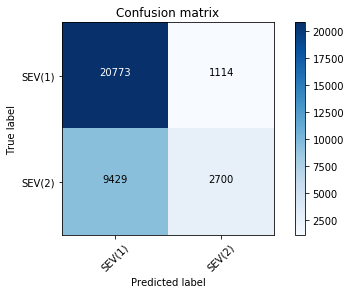

In [75]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predTree, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, predTree))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEV(1)','SEV(2)'],normalize= False,  title='Confusion matrix')

In [39]:
from sklearn.linear_model import LogisticRegression

In [55]:
LR_model = LogisticRegression(C=10, dual=False,  max_iter=10000).fit(X_train,y_train)

In [56]:
LR_model

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
yhat = LR_model.predict(X_test)
yhat

array([1, 1, 2, ..., 1, 1, 1])

In [58]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.64
LR F1-score: 0.60
LR LogLoss: 0.65


/Users/michaltazky/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [44]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss